 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [78]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [17]:
# Reading whale returns
whale_df = pd.read_csv("Resources/whale_returns.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/1514788613.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv("Resources/whale_returns.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [93]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [94]:
# Drop nulls
whale_clean_df = whale_df.dropna()
whale_clean_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [95]:
# Reading algorithmic returns
algo_df = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head(10)

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/1687663609.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [96]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [97]:
# Drop nulls
algo_clean_df = algo_df.dropna()


In [98]:
algo_clean_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [99]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv("Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.head()

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/2860886163.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp_df = pd.read_csv("Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [100]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [101]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].str.replace(',','')
sp_df['Close'] = sp_df['Close'].astype(float)
sp_df.dtypes

Close    float64
dtype: object

In [102]:
sp_df.head()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [103]:
# Calculate Daily Returns
daily_returns_sp = sp_df.pct_change()
daily_returns_sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [104]:
# Drop nulls
daily_returns_clean_sp_df = daily_returns_sp.dropna()
daily_returns_clean_sp_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [105]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_clean_sp_df.columns = ["snp_retuns"]
daily_returns_clean_sp_df.head()

,snp_retuns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [106]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_clean_df, algo_clean_df, daily_returns_clean_sp_df],join = "inner", axis = 1)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

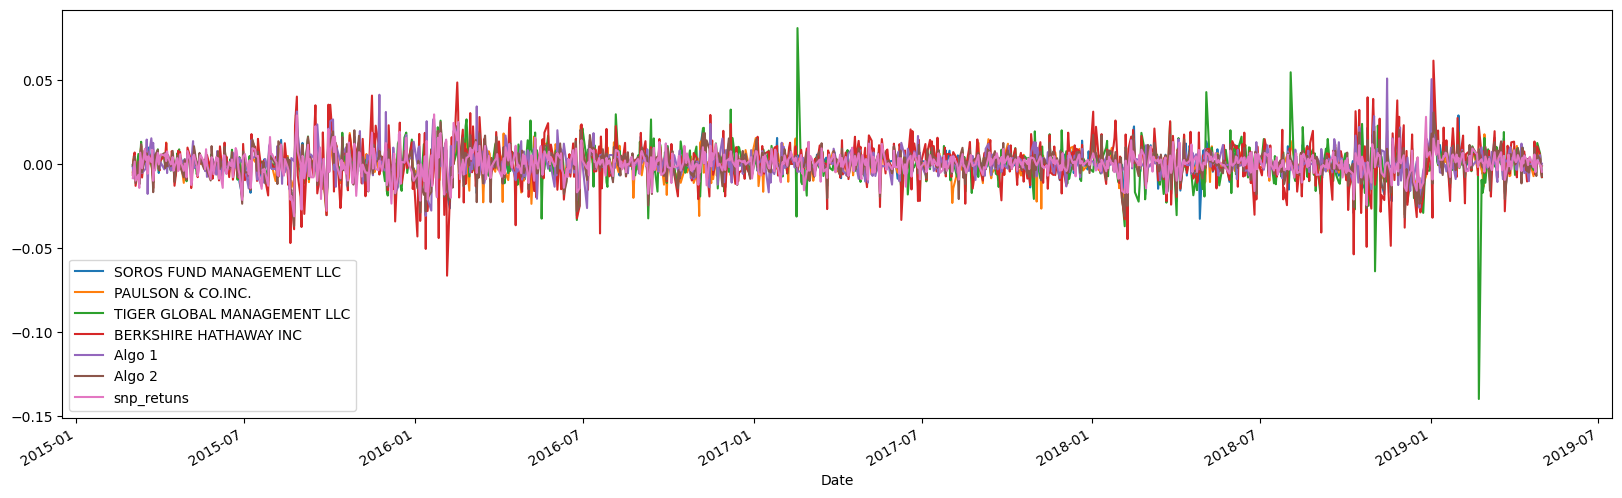

In [107]:
# Plot daily returns of all portfolios

combined_df.plot(figsize = (20,6))


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

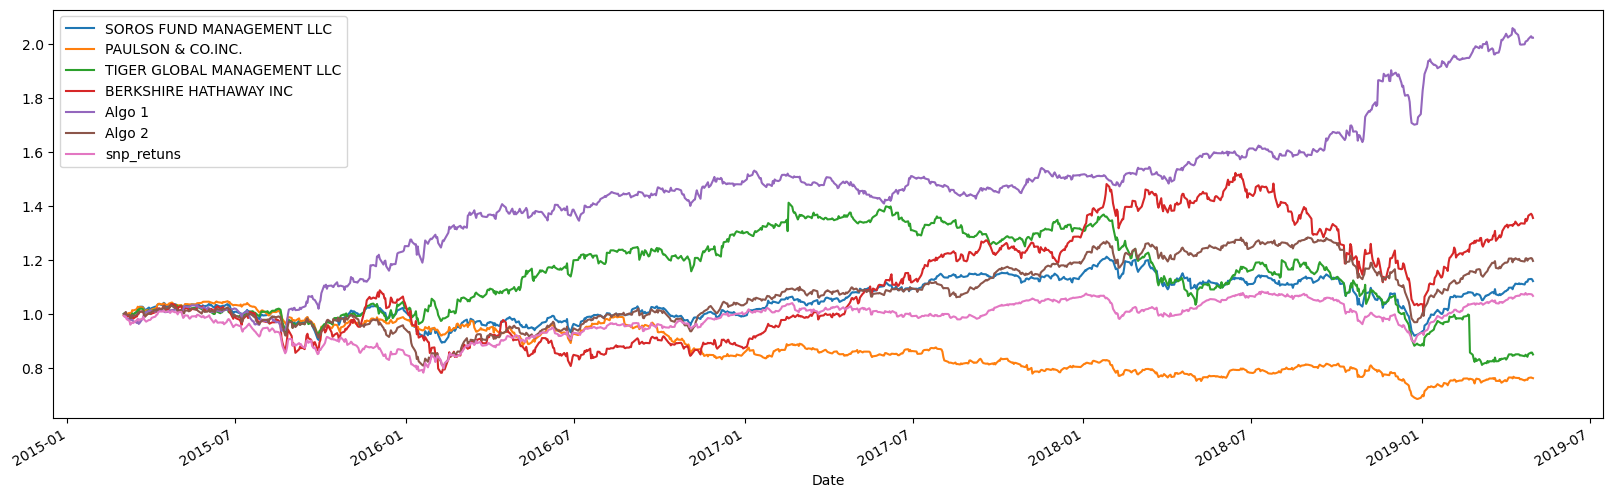

In [108]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

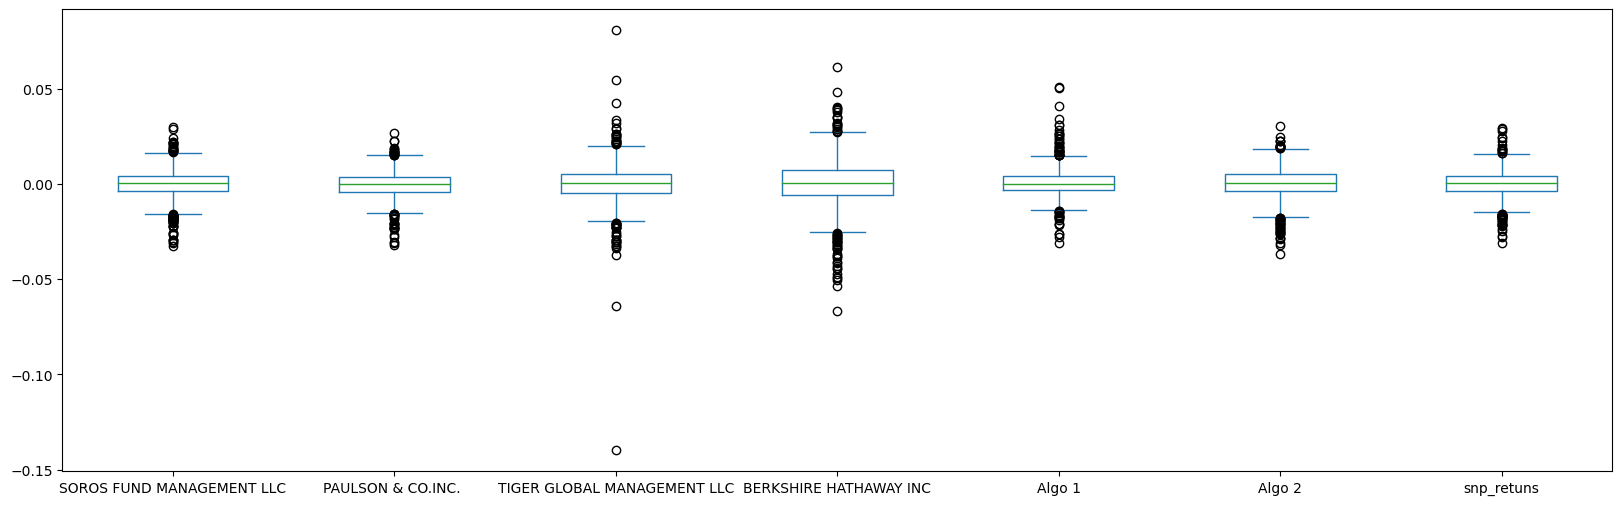

In [109]:
# Box plot to visually show risk
combined_df.plot(kind = "box" , figsize = (20,6))

### Calculate Standard Deviations

In [110]:
# Calculate the daily standard deviations of all portfolios
all_std = combined_df.std()
all_std 

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
snp_retuns                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [112]:
# Calculate  the daily standard deviation of S&P TSX 60
snp_std = combined_df["snp_retuns"].std()

# Determine which portfolios are riskier than the S&P TSX 60
all_std[all_std > snp_std]

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [113]:
# Calculate the annualized standard deviation (252 trading days)
trading_days_per_year = 252
annualized_std_dev = all_std * np.sqrt(trading_days_per_year)
annualized_std_dev.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

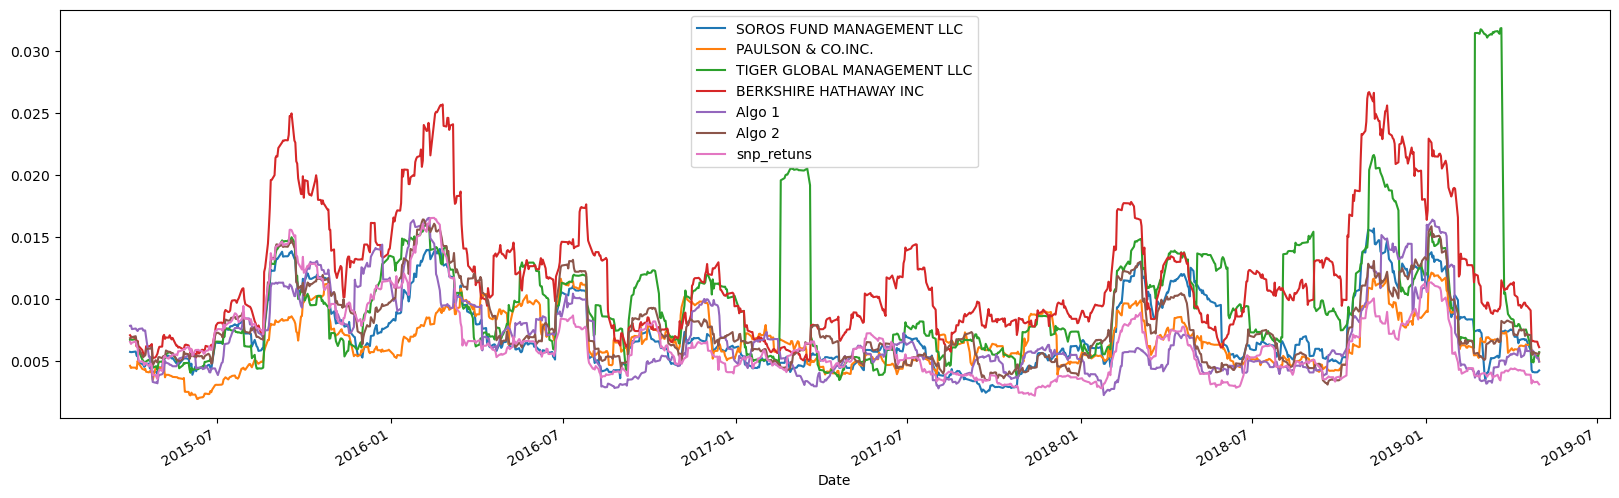

In [167]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_std.plot(figsize =(20,6))

### Calculate and plot the correlation

In [169]:
# Calculate the correlation
correlation_matrix =combined_df.corr()


# Display de correlation matrix
(correlation_matrix)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
snp_retuns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: xlabel='Date'>

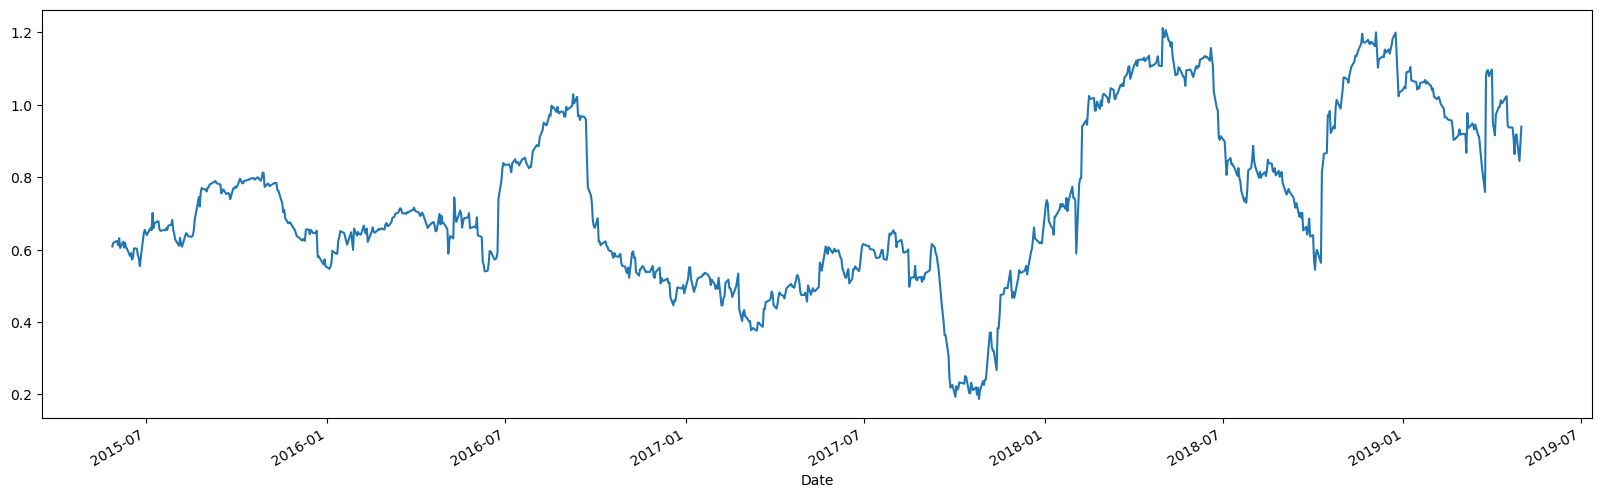

In [176]:
# Calculate covariance of a single portfolio
covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df["snp_retuns"])

(covariance)

# Calculate variance of S&P TSX

sp_variance = combined_df["snp_retuns"].rolling(window=60).var()
(sp_variance)

# Computing beta

beta = covariance/ sp_variance

# Plot beta trend

beta.plot(figsize=(20,6))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

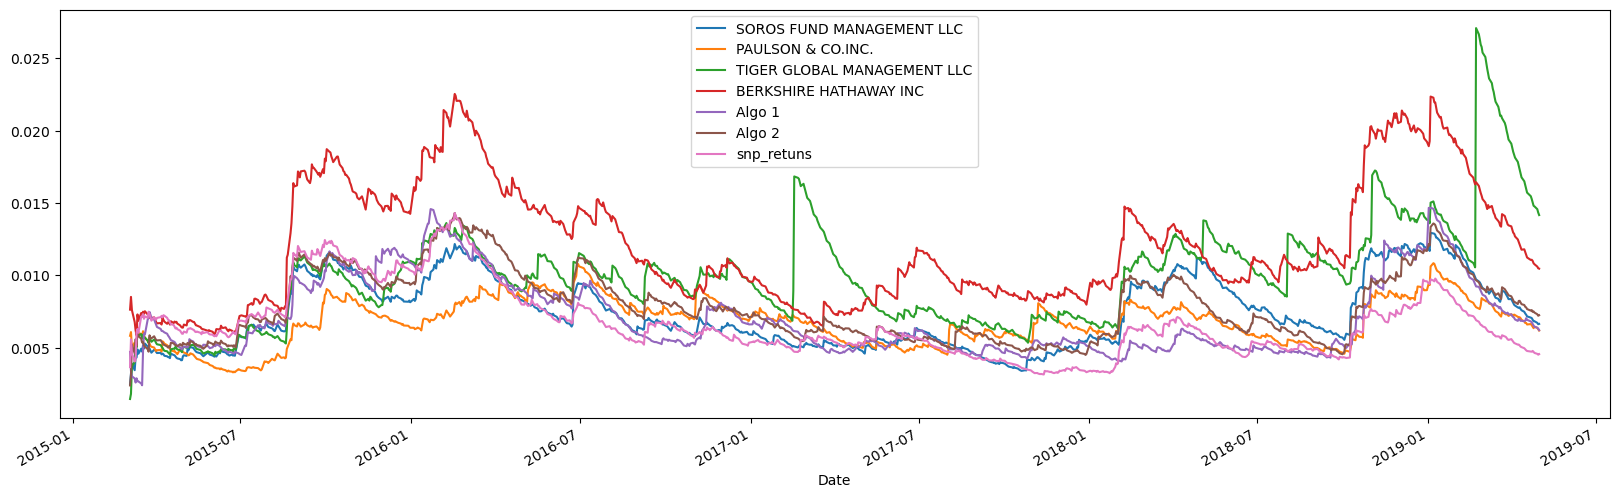

In [180]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21, adjust=False).std().plot(figsize=(20,6))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [182]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<Axes: >

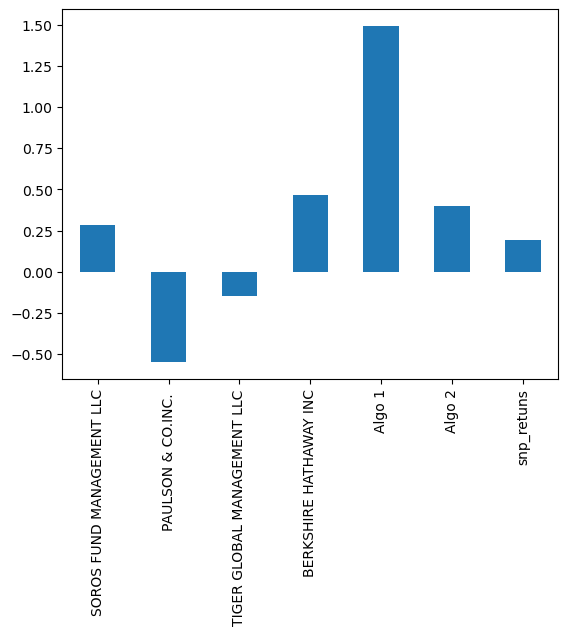

In [184]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperfoms all the markets but algo 2 outperforms snp index but doesn't outperform Berkshire Hathaway inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [187]:
# Reading data from 1st stock
stock1_df = pd.read_csv("Resources/shop_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/2836200708.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stock1_df = pd.read_csv("Resources/shop_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)


In [186]:
# Reading data from 2nd stock
stock2_df = pd.read_csv("Resources/otex_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/4104945153.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stock2_df = pd.read_csv("Resources/otex_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)


In [188]:
# Reading data from 3rd stock
stock3_df = pd.read_csv("Resources/l_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)

/var/folders/wx/x3zjpvnx4pqbyxhb2_q5jl8c0000gn/T/ipykernel_53476/2117184371.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stock3_df = pd.read_csv("Resources/l_historical.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)


In [200]:
# Combine all stocks in a single DataFrame
combinedstocks_df = pd.concat([stock1_df,stock2_df, stock3_df],join = "inner", axis = 1)
combinedstocks_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [201]:
# Reset Date index
combinedstocks_df.reset_index("Date",inplace = True)
combinedstocks_df.head()

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
1,2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2,2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
3,2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
4,2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [202]:
# Reorganize portfolio data by having a column per symbol
combinedstocks_df = combinedstocks_df.drop("Symbol",axis = 1)

combinedstocks_df.columns = ['Date', 'SHOP', 'OTEX', 'L']
combinedstocks_df.head()

,Date,SHOP,OTEX,L
0,2018-01-02,132.06,43.58,57.99
1,2018-01-03,135.15,43.07,57.41
2,2018-01-04,137.46,42.91,57.42
3,2018-01-05,137.26,42.57,57.42
4,2018-01-08,139.51,42.16,56.86


In [204]:
# Calculate daily returns
Dailyreturns_df = combinedstocks_df.set_index("Date")
Dailyreturns_df = Dailyreturns_df.pct_change()

# Drop NAs
Dailyreturns_df = Dailyreturns_df.dropna()

# Display sample data
Dailyreturns_df.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [247]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weightedreturns_df = Dailyreturns_df.dot(weights)

# Display sample data
weightedreturns_df.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [248]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["weighted returns"]= weightedreturns_df
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns,weighted returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [249]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
clean_df = combined_df.dropna()

clean_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns,weighted returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [250]:
# Calculate the annualized `std`
trading_days_per_year = 252
annual_std = clean_df * np.sqrt(trading_days_per_year)
annual_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns,weighted returns
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015853


### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

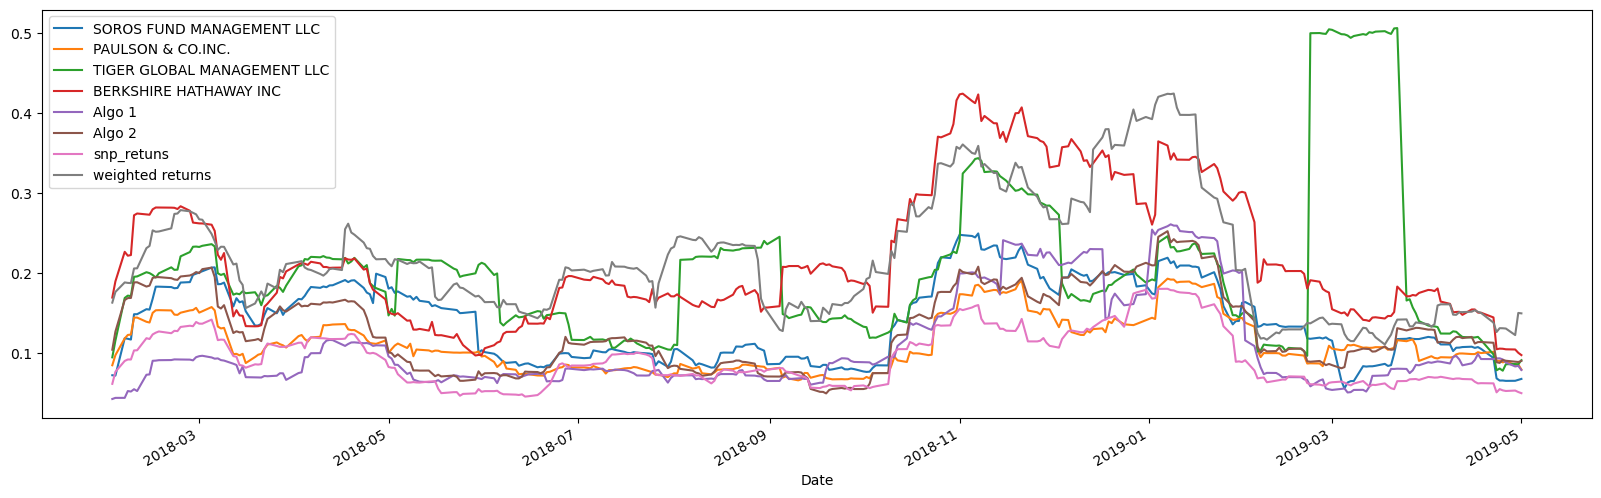

In [251]:
# Calculate rolling standard deviation
roll_std = annual_std.rolling(window=21).std()


# Plot the rolling standard deviation
roll_std.plot(figsize =(20,6))



### Calculate and plot the correlation

In [252]:
# Calculate and plot the correlation
correlation = annual_std.corr()
(correlation)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_retuns,weighted returns
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
snp_retuns,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
weighted returns,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [263]:
# Calculate and plot Beta
rolling_window = 60 
rolling_covariance = clean_df["weighted returns"].rolling(window= rolling_window).cov(clean_df["snp_retuns"])

rolling_variance = clean_df.rolling(window= rolling_window).var()

Beta = rolling_covariance / rolling_variance

beta.head()


Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [255]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (clean_df.mean() * 252) / (clean_df.std() * np.sqrt(252))

<Axes: >

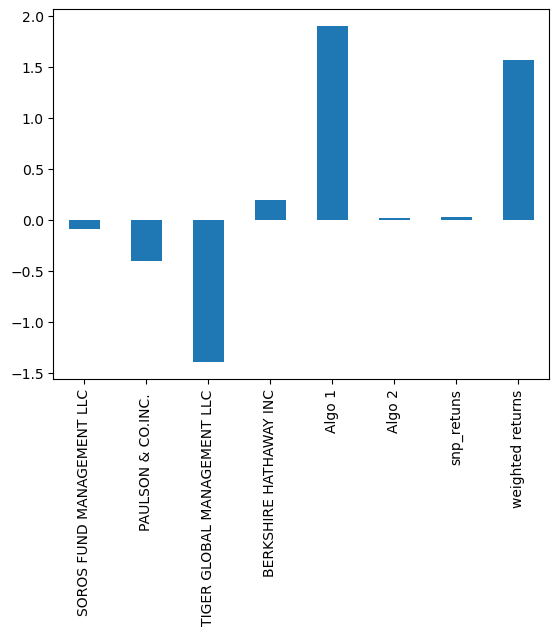

In [256]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar")

### How does your portfolio do?

weighted portfolio is outperforming every portfolio except Algo 1